In [1]:
# Importar dependências
import gempy as gp
import gempy_viewer as gpv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.precision", 2)

# Creating model object and indicating path
data_path = "../../../../../input/BES/dionisos/dionisos_grid/teste_1_downscaled/"

Setting Backend To: AvailableBackends.numpy


In [2]:
nome_modelo = "BES_Workflow_v1.0.0_Gempy_3"
geo_model: gp.data.GeoModel = gp.create_geomodel(
    project_name=nome_modelo,
    extent=[0, 175000, 0, 150000, -11000, 2000],
    resolution=[50, 50, 50],
    #refinement=4,  # * Here we define the number of octree levels. If octree levels are defined, the resolution is ignored.
    importer_helper=gp.data.ImporterHelper(
        path_to_surface_points=data_path + "surface_points_downscaled.csv",
        path_to_orientations=data_path + "orientations_points.csv",
    ),
)

In [3]:
geo_model.structural_frame

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=default_formation,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=base_formation,
	color=#015482,
	is_active=True
),
Element(
	name=mid_formation,
	color=#9f0052,
	is_active=True
),
Element(
	name=top_formation,
	color=#ffbe00,
	is_active=True
)
]
)
],
	fault_relations=
[[False]],

In [4]:
gp.map_stack_to_surfaces(
    gempy_model=geo_model,
    mapping_object=  # TODO: This mapping I do not like it too much. We should be able to do it passing the data objects directly
    {
        "Strat_Series": (
            "top_formation",),
        "Strat_Series_2": (
            "mid_formation",),
        "Strat_Series_3": (
            "base_formation",)
    }
)

#geo_model.structural_frame

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=Strat_Series,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=top_formation,
	color=#ffbe00,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series_2,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=mid_formation,
	color=#9f0052,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series_3,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=base_formation,
	color=#015482,
	is_active=True
)
]
)
],
	fault_relations=
[[False, False, False],
 [False, False, False],
 [False, False, False]],

In [5]:
#gp.map_stack_to_surfaces(
#    gempy_model=geo_model,
#    mapping_object=  # TODO: This mapping I do not like it too much. We should be able to do it passing the data objects directly
#    {
#        "Strat_Series": (
#            "top_formation",
#            "mid_formation",
#            "base_formation",
#            )
#    }
#)

#geo_model.structural_frame

In [6]:
geo_model.grid

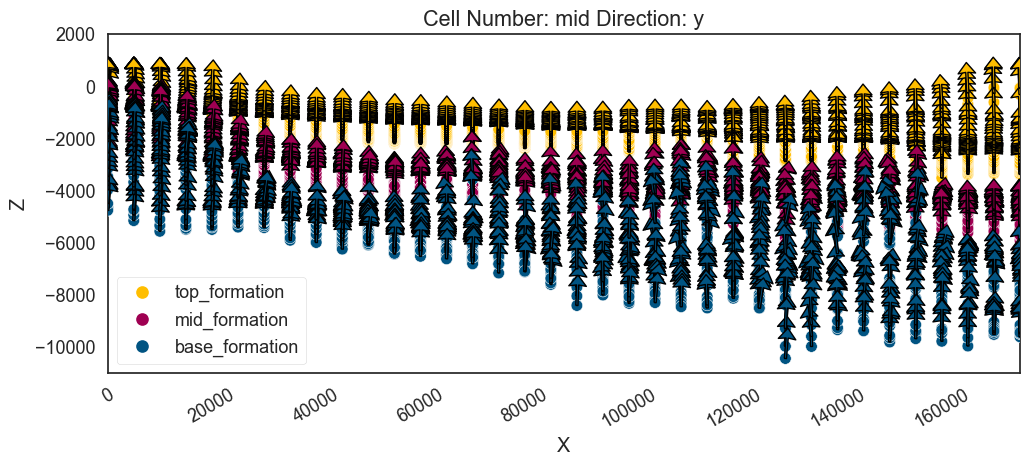

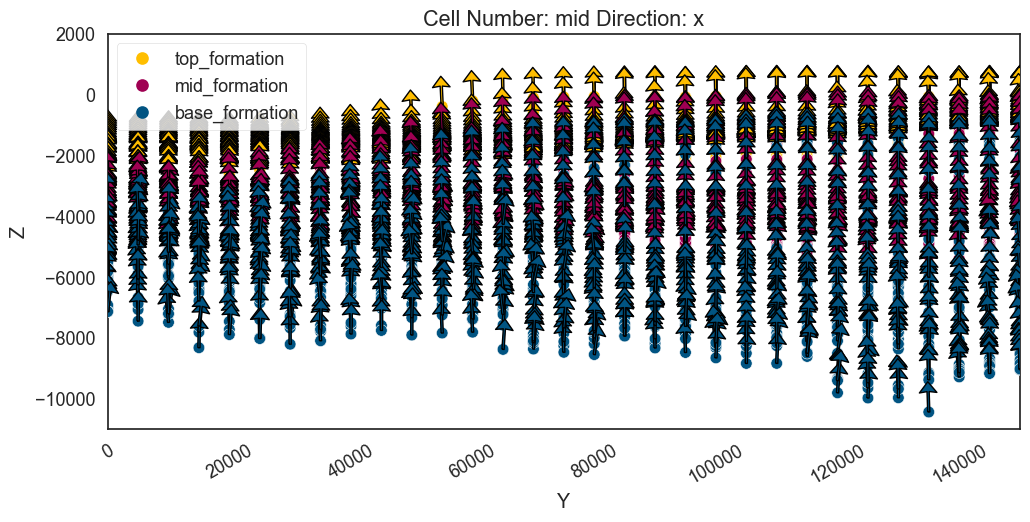

In [7]:
gpv.plot_2d(geo_model, direction="y", show_data=True, show_lith=False, ve=5, legend=True)
gpv.plot_2d(geo_model, direction="x", show_data=True, show_lith=False, ve=5, legend=True)

In [8]:
gempy_vista_premodel = gpv.plot_3d(
    geo_model,
    plotter_type="basic",  # Use 'notebook' instead of 'basic'
    active_scalar_field=None,
    ve=5,
    show_data=True,
    show_results=True,
    show_surfaces=False,
    show_lith=True,
    show_scalar=True,
    show_boundaries=True,
    show_topography=False,
    show_section_trace=True,
    show_values=True,
    show_block=False,
    show=False  # This prevents the plot from being shown immediately
)

# 
plotter = gempy_vista_premodel.p

# Customize the plot
plotter.show_grid()
#plotter.show_grid(all_edges=False)
plotter.show_bounds(font_size=6, location="furthest") # show_xaxis=False, show_yaxis=False, show_zaxis=Falsehttps://docs.pyvista.org/version/stable/api/plotting/_autosummary/pyvista.renderer.show_bounds#pyvista.Renderer.show_bounds
#plotter.add_text("BES", position=(500, 700, 1000), font_size=20)
plotter.set_background("white")
#plotter.border_color = "black" 


# Show the plot
plotter.show()

In [8]:
"""bounds = [0.0, 179000.0, 0.0, 148000.0, -20000, 500]

# Calculate midpoints
mid_x = (bounds[0] + bounds[1]) / 2
mid_y = (bounds[2] + bounds[3]) / 2

# Set section grid
gp.set_section_grid(
    grid=geo_model.grid,
    section_dict={
        'section1': ([bounds[0], mid_y], [bounds[1], mid_y], [200, 150])
    }
)"""

"bounds = [0.0, 179000.0, 0.0, 148000.0, -20000, 500]\n\n# Calculate midpoints\nmid_x = (bounds[0] + bounds[1]) / 2\nmid_y = (bounds[2] + bounds[3]) / 2\n\n# Set section grid\ngp.set_section_grid(\n    grid=geo_model.grid,\n    section_dict={\n        'section1': ([bounds[0], mid_y], [bounds[1], mid_y], [200, 150])\n    }\n)"

In [9]:
#gpv.plot_section_traces(geo_model)

In [10]:
#bes_series = geo_model.structural_frame.get_group_by_name("Strat_Series")

In [11]:
"""gp.modify_surface_points(
    geo_model=geo_model,
    elements_names=["bes_89", "bes_90", "bes_91", "bes_92", "bes_93", "bes_94", "bes_95", "bes_96", "bes_97", "bes_98", "bes_99", "bes_100"],
    nugget=0.01
)"""

'gp.modify_surface_points(\n    geo_model=geo_model,\n    elements_names=["bes_89", "bes_90", "bes_91", "bes_92", "bes_93", "bes_94", "bes_95", "bes_96", "bes_97", "bes_98", "bes_99", "bes_100"],\n    nugget=0.01\n)'

In [12]:
#geo_model.interpolation_options

In [13]:
"""geo_model.interpolation_options.number_octree_levels = 5
geo_model.interpolation_options.number_octree_levels_surface = 4
geo_model.interpolation_options.kernel_options.range = .8"""

'geo_model.interpolation_options.number_octree_levels = 5\ngeo_model.interpolation_options.number_octree_levels_surface = 4\ngeo_model.interpolation_options.kernel_options.range = .8'

In [14]:
#print(geo_model.structural_frame)

In [9]:
model = gp.compute_model(
    geo_model,
    engine_config=gp.data.GemPyEngineConfig(
        dtype="float64",
    ))

Setting Backend To: AvailableBackends.numpy


MemoryError: Unable to allocate 4.27 GiB for an array with shape (4466, 128348) and data type float64

In [ ]:
"""model = gp.compute_model(
    geo_model,
    engine_config=gp.data.GemPyEngineConfig(
        backend=gp.data.AvailableBackends.PYTORCH, # Padrão é numpy, só comentar essa parte
        use_gpu=True, # para usar o GPU (não sei se funciona sem CUDA - testar)
        #dtype="float64", "float32"
    ))"""

In [ ]:
"""geo_model.transform.apply_anisotropy(gp.data.GlobalAnisotropy.NONE)
gp.add_structural_group(
    model=geo_model,
    group_index=0,
    structural_group_name="seafloor_series",
    elements=[geo_model.structural_frame.get_element_by_name("seafloor")],
    structural_relation=gp.data.StackRelationType.ERODE,
)

gp.add_structural_group(
    model=geo_model,
    group_index=1,
    structural_group_name="right_series",
    elements=[
        geo_model.structural_frame.get_element_by_name("rock1"),
        geo_model.structural_frame.get_element_by_name("rock2"),
    ],
    structural_relation=gp.data.StackRelationType.ONLAP
)

gp.add_structural_group(
    model=geo_model,
    group_index=2,
    structural_group_name="onlap_series",
    elements=[geo_model.structural_frame.get_element_by_name("onlap_surface")],
    structural_relation=gp.data.StackRelationType.ERODE
)

gp.add_structural_group(
    model=geo_model,
    group_index=3,
    structural_group_name="left_series",
    elements=[geo_model.structural_frame.get_element_by_name("rock3")],
    structural_relation=gp.data.StackRelationType.BASEMENT
)

gp.remove_structural_group_by_name(model=geo_model, group_name="default_formation")

# Final structural frame
geo_model.structural_frame"""

In [ ]:
"""gpv.plot_2d(
    model=geo_model,
    cell_number=2,
    override_regular_grid=geo_model.solutions.raw_arrays.mask_matrix[0],
    show_data=True, kwargs_lithology={'cmap': 'gray', 'norm': None}
)

gpv.plot_2d(
    model=geo_model,
    cell_number=2,
    override_regular_grid=geo_model.solutions.raw_arrays.mask_matrix[1],
    show_data=True, kwargs_lithology={'cmap': 'gray', 'norm': None}
)

gpv.plot_2d(
    model=geo_model,
    cell_number=2,
    override_regular_grid=geo_model.solutions.raw_arrays.mask_matrix[2],
    show_data=True, kwargs_lithology={'cmap': 'gray', 'norm': None}
)

gpv.plot_2d(
    model=geo_model,
    cell_number=2,
    override_regular_grid=geo_model.solutions.raw_arrays.mask_matrix[3],
    show_data=True, kwargs_lithology={'cmap': 'gray', 'norm': None}
)"""

In [ ]:
"""gpv.plot_2d(
    model=geo_model,
    cell_number=2,
    override_regular_grid=geo_model.solutions.raw_arrays.mask_matrix_squeezed[0],
    show_data=True, kwargs_lithology={'cmap': 'gray', 'norm': None}
)

gpv.plot_2d(
    model=geo_model,
    cell_number=2,
    override_regular_grid=geo_model.solutions.raw_arrays.mask_matrix_squeezed[1],
    show_data=True, kwargs_lithology={'cmap': 'gray', 'norm': None}
)

gpv.plot_2d(
    model=geo_model,
    cell_number=2,
    override_regular_grid=geo_model.solutions.raw_arrays.mask_matrix_squeezed[2],
    show_data=True, kwargs_lithology={'cmap': 'gray', 'norm': None}
)

gpv.plot_2d(
    model=geo_model,
    cell_number=2,
    override_regular_grid=geo_model.solutions.raw_arrays.mask_matrix_squeezed[3],
    show_data=True, kwargs_lithology={'cmap': 'gray', 'norm': None}
)"""

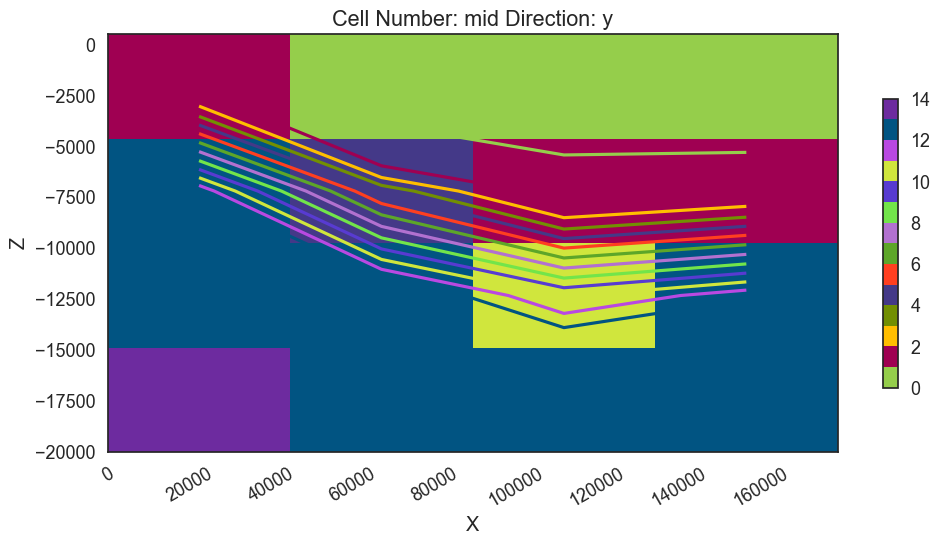

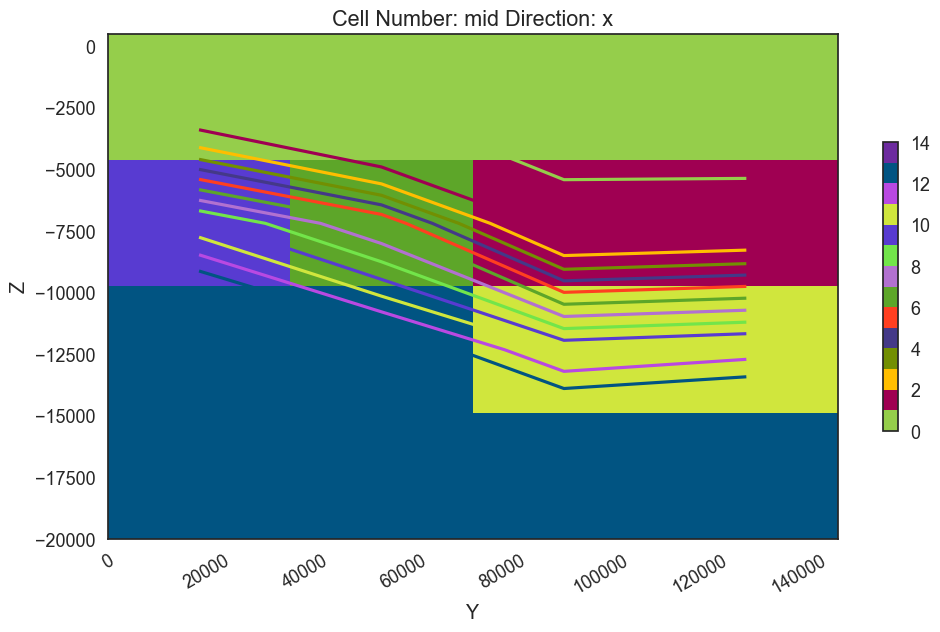

In [ ]:
gpv.plot_2d(geo_model, direction="y", show_data=False, show_lith=True, ve=5, legend=False)
gpv.plot_2d(geo_model, direction="x", show_data=False, show_lith=True, ve=5, legend=False)

In [ ]:
gempy_vista_model = gpv.plot_3d(
    geo_model,
    plotter_type="basic",  # Use 'notebook' instead of 'basic'
    ve=5,
    show_data=True,
    show_results=True,
    show_surfaces=False,
    show_boundaries=True,
    show_topography=False,
    show_section_trace=True,
    show_values=True,
    show_block=False,
    show=False  # This prevents the plot from being shown immediately
)

# 
plotter = gempy_vista_model.p

# Adiciona uma luz
#plotter.enable_eye_dome_lighting()

# Customize the plot
#plotter.show_grid(all_edges=False)
plotter.show_bounds(font_size=6, location="furthest") # show_xaxis=False, show_yaxis=False, show_zaxis=Falsehttps://docs.pyvista.org/version/stable/api/plotting/_autosummary/pyvista.renderer.show_bounds#pyvista.Renderer.show_bounds
#plotter.add_text("BES", position=(500, 700, 1000), font_size=20)
plotter.set_background("white")
#plotter.border_color = "black" 

# Show the plot
plotter.show()

In [ ]:
#gpv.plot_2d(geo_model, show_topography=False, section_names=['meio'], show_lith=True)

In [ ]:
"""gpv.plot_2d(geo_model, cell_number=[4], direction=['y'], show_topography=True, show_data=True)
gpv.plot_2d(geo_model, cell_number=[-4], direction=['y'], show_topography=True, show_data=True)"""

In [ ]:
#gpv.plot_3d(geo_model, show_lith=True, show_topography=False, kwargs_plot_structured_grid={'opacity': 0.8})